Dataset:http://archive.ics.uci.edu/ml/datasets/online+retail

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt 
df = pd.read_excel('Online Retail.xlsx')

Reviewing The Data

In [58]:
df.shape

(541909, 8)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [60]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
#CustomerID is being an object type
df['CustomerID'] = df['CustomerID'].astype('object')

In [62]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [63]:
# Removing the negative quantity values and negative UnitPrice values
df = df[(df['Quantity'] > 0)]
df = df[(df['UnitPrice'] > 0)]

In [64]:
#Check unique value for each column in df
def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)
unique_counts(df)

InvoiceNo :  19960
StockCode :  3922
Description :  4026
Quantity :  375
InvoiceDate :  18499
UnitPrice :  1291
CustomerID :  4338
Country :  38


In [65]:
# Check for missing values 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [66]:
# Remove null values for CustomerID
df = df[pd.notnull(df['CustomerID'])]

In [67]:
# Check for duplicates
df.duplicated().sum()

5192

In [68]:
# Remove duplicates 
df = df.drop_duplicates()

In [69]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [70]:
# Create total price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [71]:
# Convert RegistrationTime to datetime object  
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [72]:
# Create data frame without target window data 
# Target windows is the last 7 days
df1 = df[df['InvoiceDate'] < '2011-12-3']
df1.shape

(379725, 9)

In [73]:
# Create new dataframe to hold data in the prediction/target window 
df2 = df[df['InvoiceDate'] >= '2011-12-3']
df2.shape

(12967, 9)

In [74]:
# Create target column for df2 
df2 = df2.assign(Purchase=1)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Purchase
522165,580384,22193,RED DINER WALL CLOCK,2,2011-12-04 10:10:00,8.50,17243.0,United Kingdom,17.00,1
522166,580384,23355,HOT WATER BOTTLE KEEP CALM,2,2011-12-04 10:10:00,4.95,17243.0,United Kingdom,9.90,1
522167,580384,22114,HOT WATER BOTTLE TEA AND SYMPATHY,7,2011-12-04 10:10:00,4.25,17243.0,United Kingdom,29.75,1
522168,580384,22835,HOT WATER BOTTLE I AM SO POORLY,5,2011-12-04 10:10:00,4.95,17243.0,United Kingdom,24.75,1
522169,580384,22112,CHOCOLATE HOT WATER BOTTLE,4,2011-12-04 10:10:00,4.95,17243.0,United Kingdom,19.80,1


In [75]:
# For df2 (target window dataframe), remove all columns except for CustomerID and Purchase
df2 = df2.loc[:, ['CustomerID','Purchase']]

In [76]:
df2 = df2.set_index('CustomerID')
df2.head()

,Purchase
CustomerID,
17243.0,1
17243.0,1
17243.0,1
17243.0,1
17243.0,1


In [77]:
# Create Recency, Frequency, and Monetary Features
most_recent = dt.datetime(2011,12,3)
features1 = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (most_recent - x.max()).days, 
                                          'InvoiceNo': lambda x: x.nunique(),
                                          'TotalPrice': lambda x: x.sum()})

features1['InvoiceDate'] = features1['InvoiceDate'].astype(int)

features1.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency',
                         'TotalPrice': 'Monetary Value'}, inplace=True)

In [78]:
# Create days since first purchase column
features2 = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (most_recent - x.min()).days})
features2['InvoiceDate'] = features2['InvoiceDate'].astype(int)
features2.rename(columns={'InvoiceDate': 'days since first purchase'}, inplace=True)

In [79]:
# Combine features into one dataframe 
features = pd.merge(features1, features2, left_index=True, right_index=True)

In [80]:
# Create new feature: average time between each purchase 
features['Avg Time Between Purchases'] = (features['days since first purchase'] - features['Recency'])/features['Frequency']

In [81]:
# Join the target window column to features dataframe 
features = features.join(df2).fillna(0)
features = features.drop_duplicates(keep='first')
features.head()

,Recency,Frequency,Monetary Value,days since first purchase,Avg Time Between Purchases,Purchase
CustomerID,,,,,,
12346.0,318,1,77183.60,318,0.000000,0.0
12347.0,32,6,4085.18,360,54.666667,1.0
12348.0,68,4,1797.24,351,70.750000,0.0
12349.0,11,1,1757.55,11,0.000000,0.0
12350.0,303,1,334.40,303,0.000000,0.0


In [82]:
features.shape

(4307, 6)

In [83]:
# Purchase distribution
print("Did not purchase during the target window:", features['Purchase'][features['Purchase'] == 0].count()) #class = 0
print("Purchased during the target window:", features['Purchase'][features['Purchase'] == 1].count()) #class = 1

Did not purchase during the target window: 3874
Purchased during the target window: 433


In [84]:
features.dtypes

Recency                         int32
Frequency                       int64
Monetary Value                float64
days since first purchase       int32
Avg Time Between Purchases    float64
Purchase                      float64
dtype: object

In [85]:
# Convert recency and purchase to int64
features['Recency']= features['Recency'].astype('int64')
features['Purchase']= features['Purchase'].astype('int64')

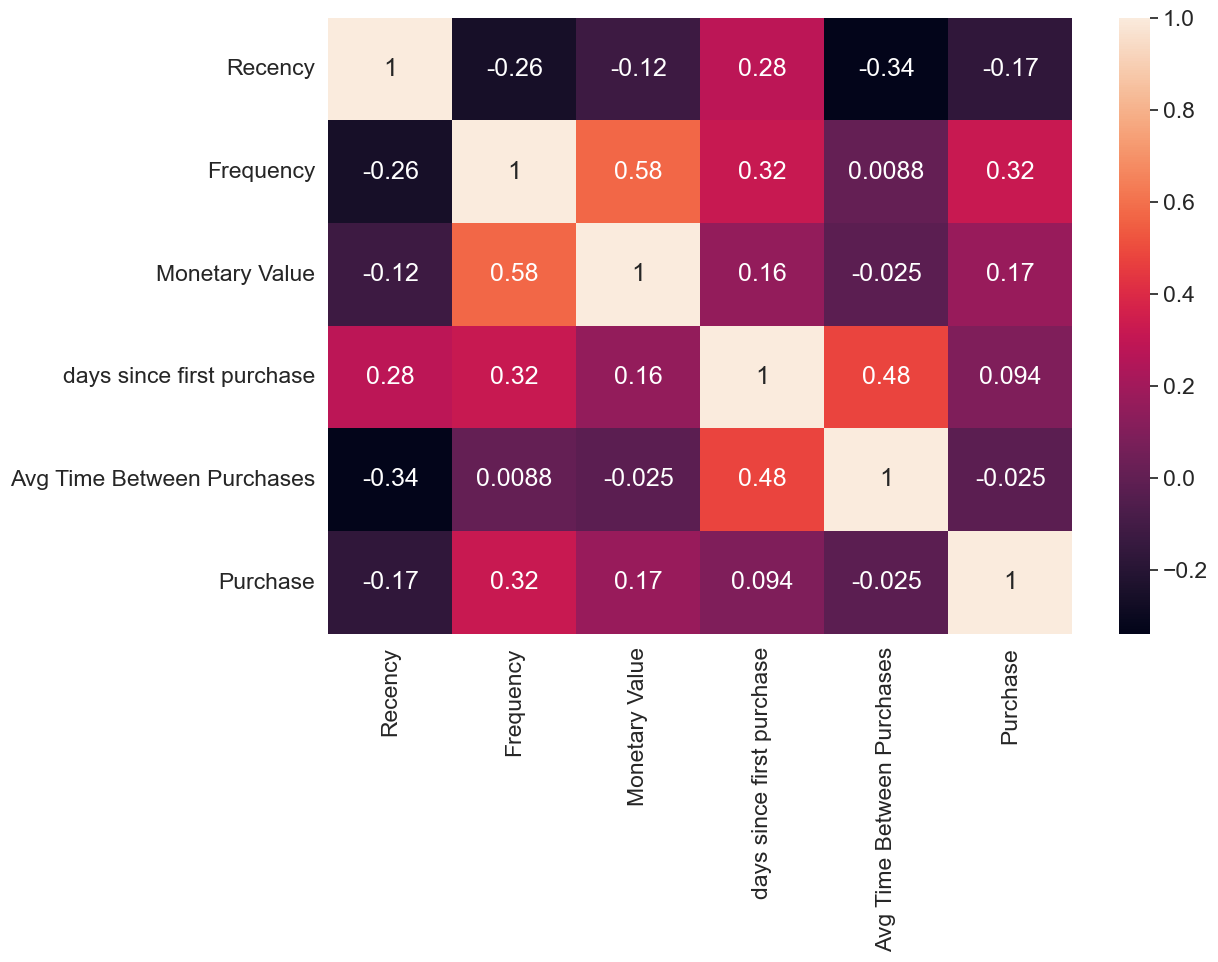

In [86]:
import seaborn as sns

plt.figure(figsize = (12, 8))
features_corr = features.corr()

sns.heatmap(features_corr, annot = True)
plt.show()

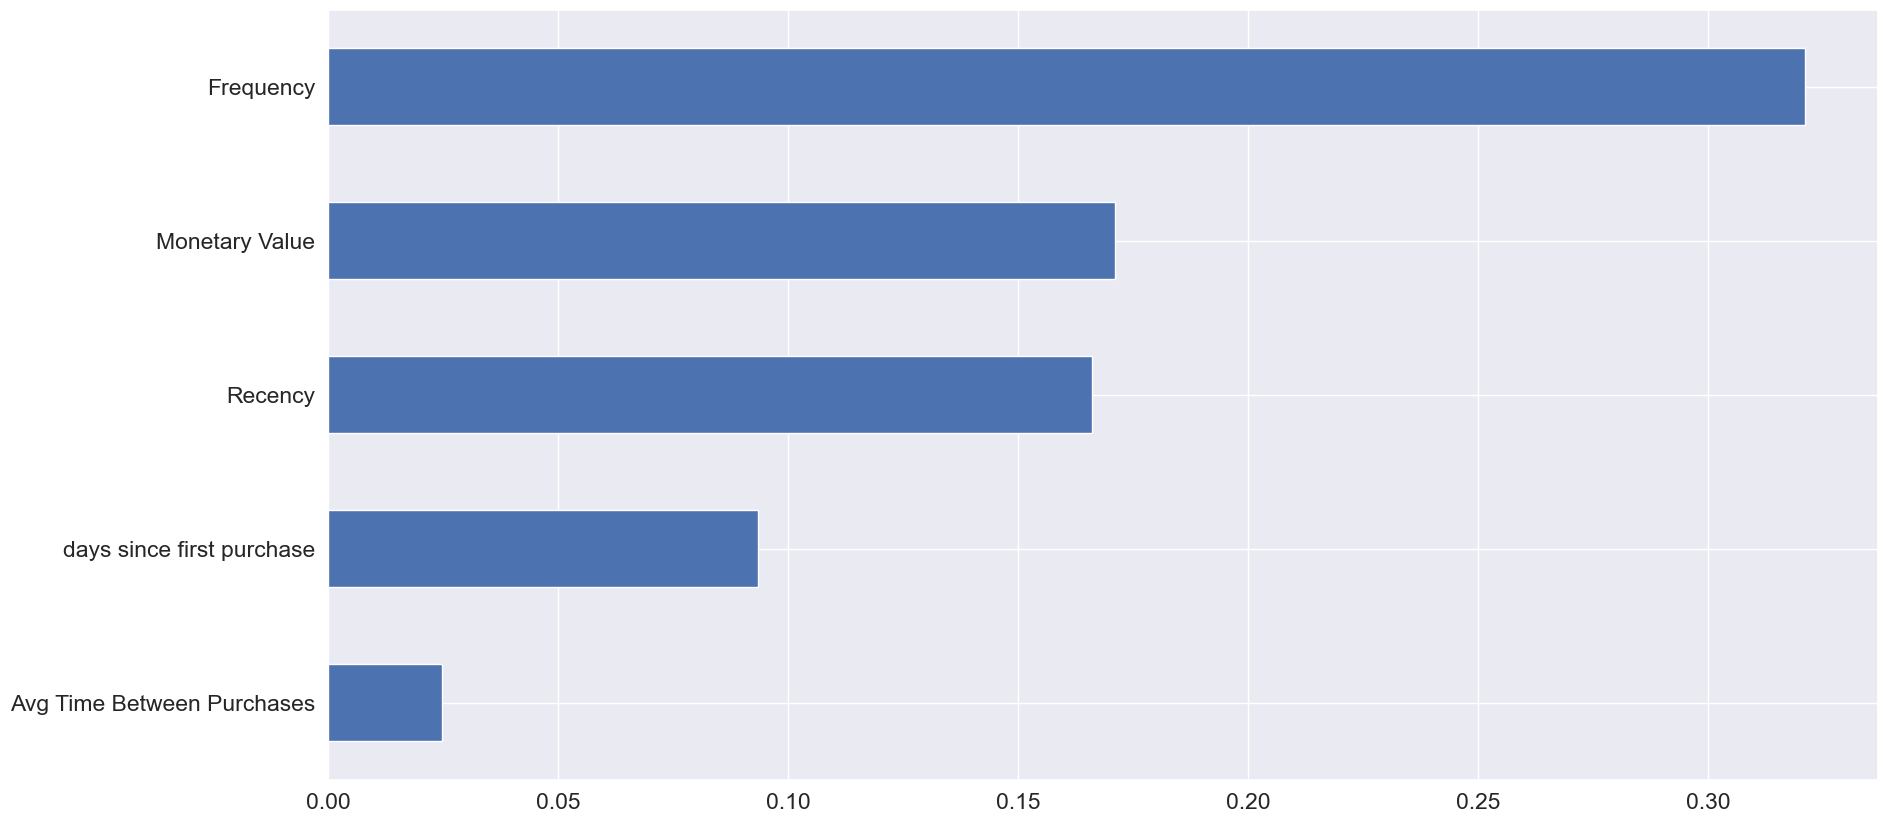

In [87]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.5)
(abs(features_corr)
 .Purchase
 .drop('Purchase')
 .sort_values()
 .plot
 .barh())
plt.show()

C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\858533356.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features[features['Purchase']==0]['Frequency'], color = 'red', label='Did not purchase in target window')
C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\858533356.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

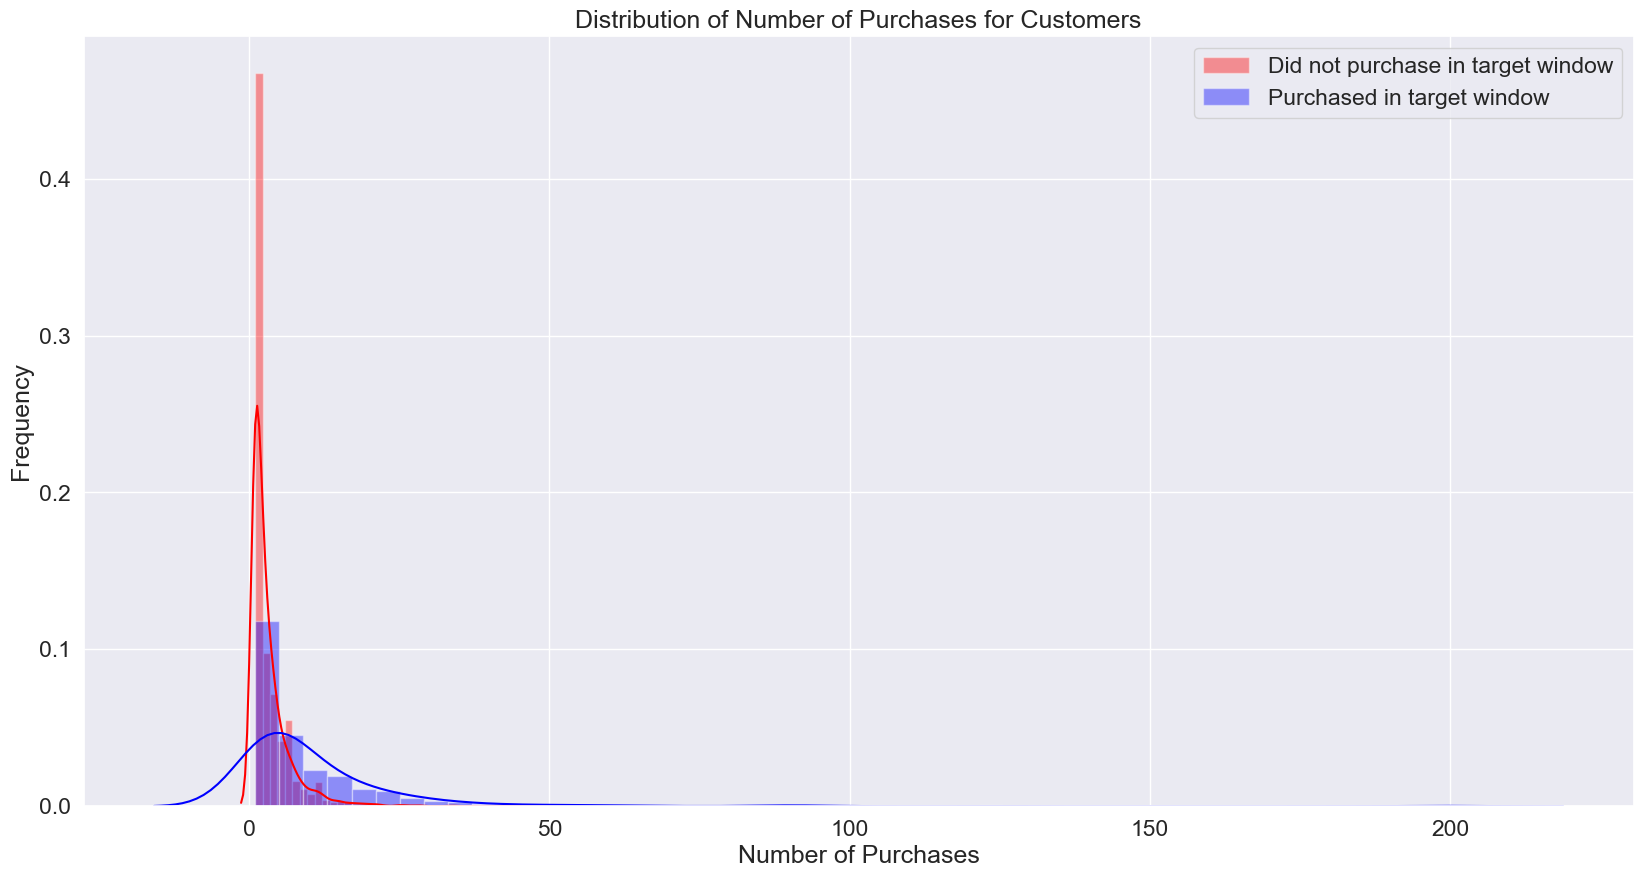

In [88]:
plt.figure(figsize = (20, 10))

sns.distplot(features[features['Purchase']==0]['Frequency'], color = 'red', label='Did not purchase in target window')
sns.distplot(features[features['Purchase']==1]['Frequency'], color = 'blue', label='Purchased in target window')
plt.ylabel('Frequency')
plt.xlabel('Number of Purchases')
plt.title('Distribution of Number of Purchases for Customers')
plt.legend()
plt.show()

C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\560144742.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features[features['Purchase']==0]['Recency'], color = 'red', label='Did not purchase in target window')
C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\560144742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

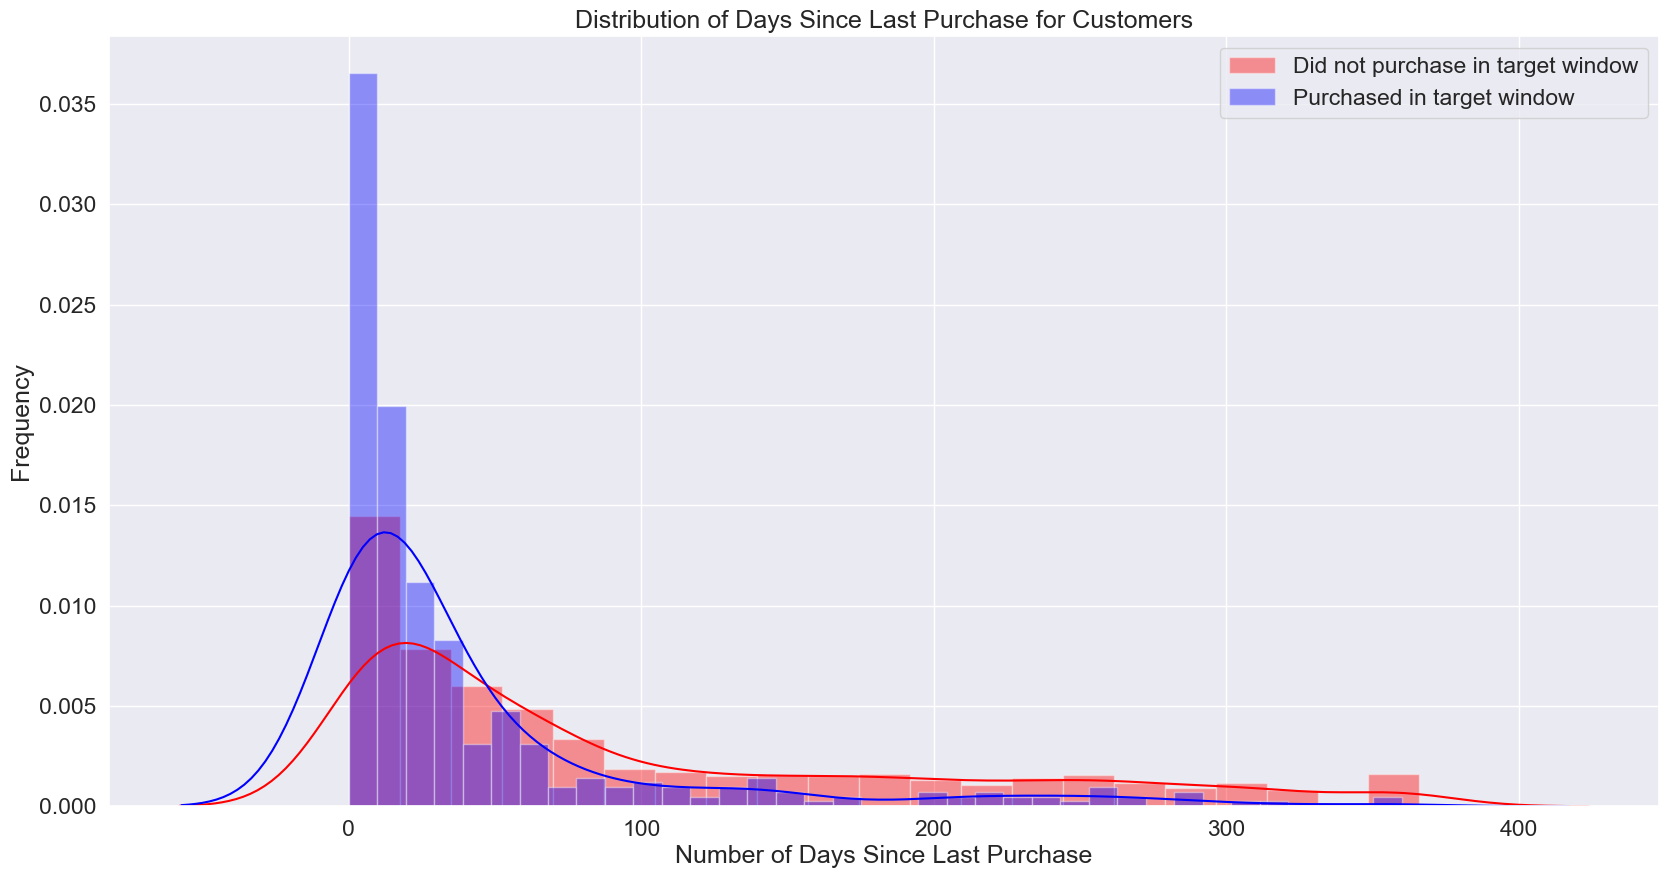

In [89]:

plt.figure(figsize = (20, 10))

sns.distplot(features[features['Purchase']==0]['Recency'], color = 'red', label='Did not purchase in target window')
sns.distplot(features[features['Purchase']==1]['Recency'], color = 'blue', label='Purchased in target window')
plt.ylabel('Frequency')
plt.xlabel('Number of Days Since Last Purchase')
plt.title('Distribution of Days Since Last Purchase for Customers')
plt.legend()
plt.show()

C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\1276267405.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features[features['Purchase']==0]['Monetary Value'], color = 'red', label='Did not purchase in target window')
C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\1276267405.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

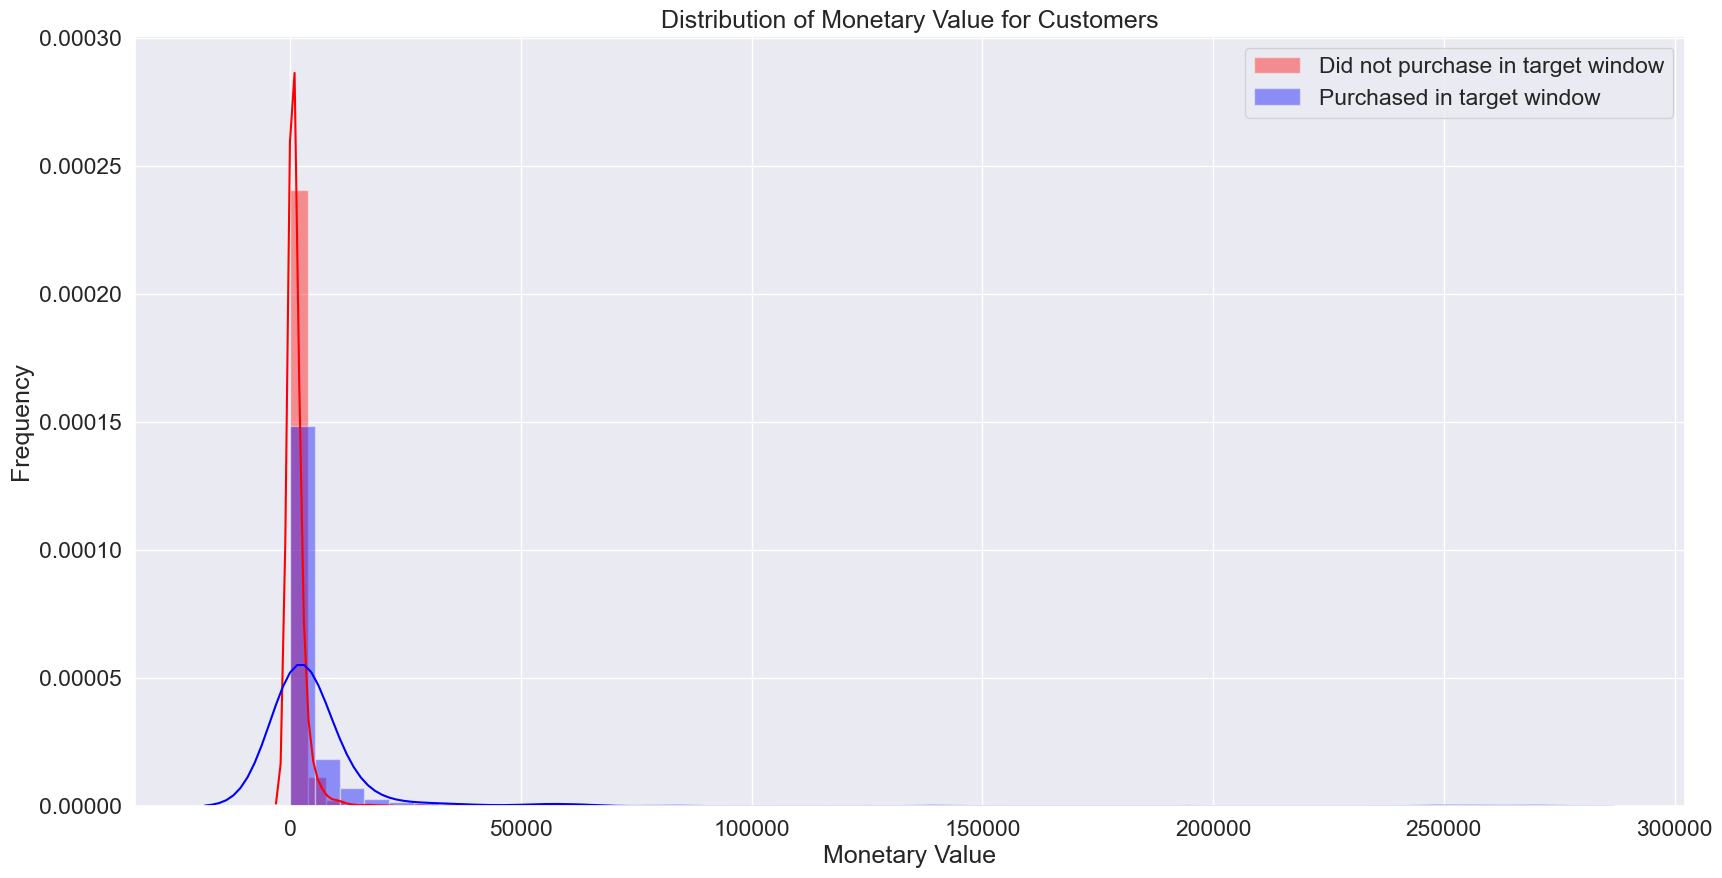

In [90]:
plt.figure(figsize = (20, 10))

sns.distplot(features[features['Purchase']==0]['Monetary Value'], color = 'red', label='Did not purchase in target window')
sns.distplot(features[features['Purchase']==1]['Monetary Value'], color = 'blue', label='Purchased in target window')
plt.ylabel('Frequency')
plt.xlabel('Monetary Value')
plt.title('Distribution of Monetary Value for Customers')
plt.legend()
plt.show()

C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\2869285694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features[features['Purchase']==0]['Avg Time Between Purchases'],
C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\2869285694.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(featu

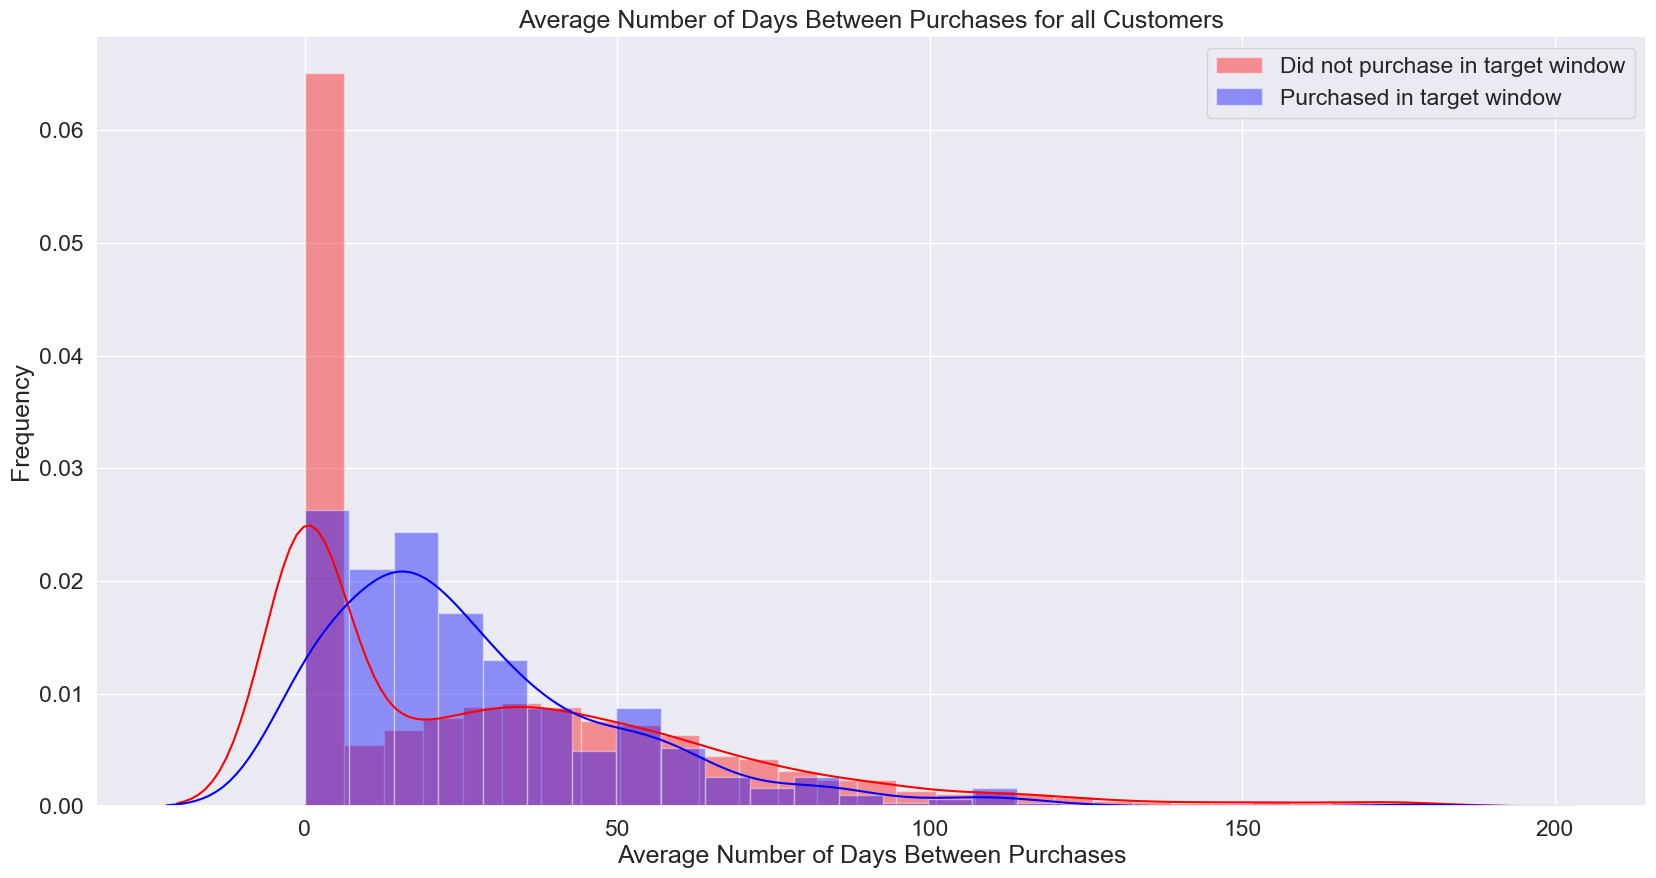

In [91]:
plt.figure(figsize = (20, 10))

sns.distplot(features[features['Purchase']==0]['Avg Time Between Purchases'], 
             color = 'red', label='Did not purchase in target window')
sns.distplot(features[features['Purchase']==1]['Avg Time Between Purchases'], 
             color = 'blue', label='Purchased in target window')
plt.ylabel('Frequency')
plt.xlabel('Average Number of Days Between Purchases')
plt.title('Average Number of Days Between Purchases for all Customers')
plt.legend()
plt.show()

ML Development

In [92]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from scipy.stats import randint
import matplotlib.pyplot as plt

# Split into training and testing sets 
X = features.drop('Purchase', axis=1)
y = features['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.25, random_state=99)

In [93]:
# Logistic Regression - Baseline Model
logreg = LogisticRegression(random_state=0, class_weight='balanced')
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)

print("Logistic Regression - Testing Accuracy:", (round(accuracy_score(y_test, logreg_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test, logreg_pred))

Logistic Regression - Testing Accuracy: 0.71


[[692 277]
 [ 33  75]]


              precision    recall  f1-score   support

           0       0.95      0.71      0.82       969
           1       0.21      0.69      0.33       108

    accuracy                           0.71      1077
   macro avg       0.58      0.70      0.57      1077
weighted avg       0.88      0.71      0.77      1077



AUC Score: 0.7042913656690747


In [94]:
# XGBoost
weights = (y==0).sum()/(1.0 *  (y==1).sum())
xgb = XGBClassifier(silent=True,
                      random_state=1, 
                      scale_pos_weight=weights,
                      learning_rate=0.03,  
                      colsample_bytree = 0.8,
                      subsample = 0.7,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.25,
                      min_child_weight = 2,
                      max_depth=5,
                      n_jobs = -1,
                      gamma=1)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost - Testing Accuracy:", (round(accuracy_score(y_test, xgb_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, xgb_pred))
print('\n')
print(classification_report(y_test, xgb_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test,xgb_pred))

[14:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

XGBoost - Testing Accuracy: 0.79


[[783 186]
 [ 41  67]]


              precision    recall  f1-score   support

           0       0.95      0.81      0.87       969
           1       0.26      0.62      0.37       108

    accuracy                           0.79      1077
   macro avg       0.61      0.71      0.62      1077
weighted avg       0.88      0.79      0.82      1077



AUC Score: 0.7142099529870427


<Axes: >

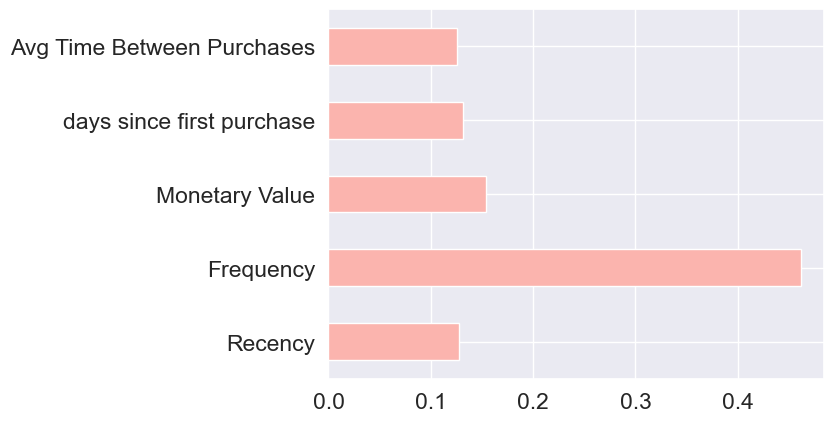

In [95]:
# XGBoost Feature Importance
(pd.Series(xgb.feature_importances_, index=X.columns)
   .plot(kind='barh', colormap = 'Pastel1'))  

In [96]:
# XGboost - Hyperparameter Tuning with Randomized Search CV 
weights = (y==0).sum()/(1.0 *  (y==1).sum())
xgb = XGBClassifier(random_state=1, scale_pos_weight = weights, n_jobs = -1, objective = 'binary:logistic')
xgb_params = {'n_estimators': randint(100, 300),
              'learning_rate': uniform(0.01, 0.05),
              'subsample': uniform(0.5, 1.0),
              'max_depth': [4, 5, 6, 7, 8],
              'colsample_bytree': uniform(0.5, 1.0),
              'min_child_weight': [1, 2, 3],
              'gamma': [0.3, 0.5, 0.7, 1]
             }

xgb_rs = RandomizedSearchCV(xgb,xgb_params,cv=10,n_jobs=-1, n_iter = 300, scoring = 'f1', error_score = 0, verbose = 3)
xgb_rs.fit(X_train, y_train)
print("XGB Best Parameters:", xgb_rs.best_params_)
print("XGB Best Score:", xgb_rs.best_score_)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


c:\Users\Zeynep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2230 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Zeynep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Zeynep\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\Zeynep\AppData\Local\Programs\Python\Python311\Lib\site-

XGB Best Parameters: {'colsample_bytree': 0.7853150075595415, 'gamma': 0.5, 'learning_rate': 0.01341889218927396, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 161, 'subsample': 0.6713890086093084}
XGB Best Score: 0.36767846247666613


In [97]:
xgb_pred = xgb_rs.predict(X_test)
print("XGBoost - Testing Accuracy:", (round(accuracy_score(y_test, xgb_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, xgb_pred))
print('\n')
print(classification_report(y_test, xgb_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test,xgb_pred))

XGBoost - Testing Accuracy: 0.8


[[802 167]
 [ 44  64]]


              precision    recall  f1-score   support

           0       0.95      0.83      0.88       969
           1       0.28      0.59      0.38       108

    accuracy                           0.80      1077
   macro avg       0.61      0.71      0.63      1077
weighted avg       0.88      0.80      0.83      1077



AUC Score: 0.7101249856667813


In [98]:
# Random Forest 
rfc = RandomForestClassifier(random_state=1,
                             class_weight='balanced',
                             n_jobs = -1,
                             n_estimators=344,
                             max_depth=5,
                             min_samples_split=2,
                             min_samples_leaf=3,
                             max_features='auto',
                             criterion='gini'
                             )

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
                
print("Random Forest - Testing Accuracy:", (round(accuracy_score(y_test, rfc_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test,rfc_pred))

c:\Users\Zeynep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest - Testing Accuracy: 0.81


[[804 165]
 [ 38  70]]


              precision    recall  f1-score   support

           0       0.95      0.83      0.89       969
           1       0.30      0.65      0.41       108

    accuracy                           0.81      1077
   macro avg       0.63      0.74      0.65      1077
weighted avg       0.89      0.81      0.84      1077



AUC Score: 0.7389347551886252


<Axes: >

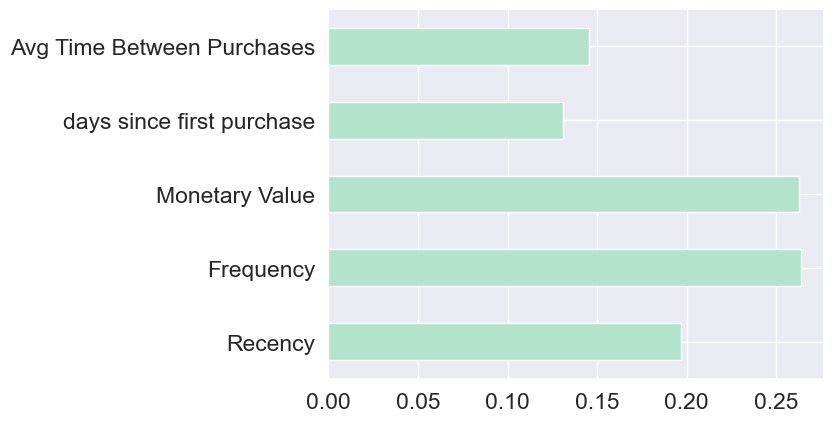

In [99]:
# Random Forest Feature Importance
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh', colormap = 'Pastel2'))

In [103]:

# AdaBoost
ada = AdaBoostClassifier(random_state=1, 
                      learning_rate=0.09,  
                      n_estimators=350)
ada.fit(X_train_rus, y_train_rus)
ada_pred = ada.predict(X_test)

print("AdaBoost - Testing Accuracy:", (round(accuracy_score(y_test, ada_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, ada_pred))
print('\n')
print(classification_report(y_test, ada_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test, ada_pred))

AdaBoost - Testing Accuracy: 0.74


[[721 248]
 [ 33  75]]


              precision    recall  f1-score   support

           0       0.96      0.74      0.84       969
           1       0.23      0.69      0.35       108

    accuracy                           0.74      1077
   macro avg       0.59      0.72      0.59      1077
weighted avg       0.88      0.74      0.79      1077



AUC Score: 0.7192552459580325


In [104]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_rus,y_train_rus)
gnb_pred = gnb.predict(X_test)

print("Gaussian Naive Bayes - Testing Accuracy:", (round(accuracy_score(y_test, logreg_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test, logreg_pred))

Gaussian Naive Bayes - Testing Accuracy: 0.71


[[692 277]
 [ 33  75]]


              precision    recall  f1-score   support

           0       0.95      0.71      0.82       969
           1       0.21      0.69      0.33       108

    accuracy                           0.71      1077
   macro avg       0.58      0.70      0.57      1077
weighted avg       0.88      0.71      0.77      1077



AUC Score: 0.7042913656690747


Best Performing Model:Random Forest 

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)
X_train_data = X_train
X_test_data = X_test

rfc = RandomForestClassifier(random_state=1,
                             class_weight='balanced',
                             n_jobs = -1,
                             n_estimators=344,
                             max_depth=5,
                             min_samples_split=2,
                             min_samples_leaf=3,
                             max_features='auto',
                             criterion='gini'
                             )

rfc.fit(X_train_data, y_train)
rfc_pred = rfc.predict_proba(X_test_data)
df_propensity1 = pd.DataFrame(data=X_test)
df_propensity1['Purchase Probability'] = rfc_pred[:,1]

c:\Users\Zeynep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [106]:
rfc_pred_train = rfc.predict_proba(X_train_data)
df_propensity2 = pd.DataFrame(data=X_train)
df_propensity2['Purchase Probability'] = rfc_pred_train[:,1]
df_propensity = pd.concat([df_propensity1,df_propensity2],axis='rows')
df_propensity.shape

(4307, 6)

In [107]:

df_propensity.sort_values(by=['Purchase Probability'], ascending=False).head()

,Recency,Frequency,Monetary Value,days since first purchase,Avg Time Between Purchases,Purchase Probability
CustomerID,,,,,,
15498.0,10,26,12451.46,359,13.423077,0.942407
16525.0,9,25,12705.73,359,14.000000,0.941355
13113.0,7,23,11906.76,359,15.304348,0.940367
13319.0,10,25,10536.45,358,13.920000,0.938644
17428.0,15,27,16841.25,361,12.814815,0.936842


In [108]:
df_propensity.sort_values(by=['Purchase Probability'], ascending=True).head()

,Recency,Frequency,Monetary Value,days since first purchase,Avg Time Between Purchases,Purchase Probability
CustomerID,,,,,,
12346.0,318,1,77183.60,318,0.0,0.069421
14439.0,312,1,2661.24,312,0.0,0.072213
12764.0,309,1,1693.88,309,0.0,0.075053
14935.0,290,1,1784.71,290,0.0,0.076768
14090.0,317,1,76.32,317,0.0,0.078424


In [109]:
propensity_90 = df_propensity[df_propensity['Purchase Probability'] >= 0.9]
propensity_80 = df_propensity[(df_propensity['Purchase Probability'] >= 0.8) & (df_propensity['Purchase Probability'] < 0.9) ]
propensity_70 = df_propensity[(df_propensity['Purchase Probability'] >= 0.7) & (df_propensity['Purchase Probability'] < 0.8) ]
propensity_60 = df_propensity[(df_propensity['Purchase Probability'] >= 0.6) & (df_propensity['Purchase Probability'] < 0.7) ]
propensity_50 = df_propensity[(df_propensity['Purchase Probability'] >= 0.5) & (df_propensity['Purchase Probability'] < 0.6) ]
propensity_40 = df_propensity[(df_propensity['Purchase Probability'] >= 0.4) & (df_propensity['Purchase Probability'] < 0.5) ]
propensity_30 = df_propensity[(df_propensity['Purchase Probability'] >= 0.3) & (df_propensity['Purchase Probability'] < 0.4) ]
propensity_20 = df_propensity[(df_propensity['Purchase Probability'] >= 0.2) & (df_propensity['Purchase Probability'] < 0.3) ]
propensity_10 = df_propensity[(df_propensity['Purchase Probability'] >= 0.1) & (df_propensity['Purchase Probability'] < 0.2) ]
propensity_0 = df_propensity[(df_propensity['Purchase Probability'] >= 0) & (df_propensity['Purchase Probability'] < 0.1) ]
propensity_90['Purchase Probability'] = "90 - 95%"
propensity_80['Purchase Probability'] = "80 - 89%"
propensity_70['Purchase Probability'] = "70 - 79%"
propensity_60['Purchase Probability'] = "60 - 69%"
propensity_50['Purchase Probability'] = "50 - 59%"
propensity_40['Purchase Probability'] = "40 - 49%"
propensity_30['Purchase Probability'] = "30 - 39%"
propensity_20['Purchase Probability'] = "20 - 29%"
propensity_10['Purchase Probability'] = "10 - 19%"
propensity_0['Purchase Probability']  = "7 - 9%"

C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\1022635999.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propensity_90['Purchase Probability'] = "90 - 95%"
C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\1022635999.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propensity_80['Purchase Probability'] = "80 - 89%"
C:\Users\Zeynep\AppData\Local\Temp\ipykernel_1208\1022635999.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [115]:
propensity_dfs = [propensity_90, propensity_80, propensity_70, propensity_60, propensity_50, propensity_40, propensity_30, propensity_20, propensity_10, propensity_0]
purchase_prob = pd.concat(propensity_dfs)
purchase_prob['Purchase Probability'].value_counts()

Purchase Probability
20 - 29%    1018
30 - 39%     951
10 - 19%     830
40 - 49%     535
50 - 59%     367
60 - 69%     254
80 - 89%     115
70 - 79%      98
90 - 95%      76
7 - 9%        63
Name: count, dtype: int64